In [252]:
# Chargement des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
import importlib; importlib.reload(model_functions)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [259]:
# Chargement des données
df=model_functions.read_data('data.csv')
df

Aperçu des données (7431 lignes, 27 colonnes):
Conversion de 'listing_price': float64 -> float64, valeurs NA créées: 244
Conversion de 'price_ttc': float64 -> float64, valeurs NA créées: 244
Conversion de 'price': float64 -> float64, valeurs NA créées: 244
Conversion de 'size': int64 -> int64, valeurs NA créées: 0
Conversion de 'rooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'bedrooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'bathrooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'parkings': float64 -> float64, valeurs NA créées: 11
Conversion de 'construction_year': float64 -> float64, valeurs NA créées: 4968
Conversion de 'age': float64 -> float64, valeurs NA créées: 4969
Conversion de 'air_conditioning': float64 -> float64, valeurs NA créées: 1863
Conversion de 'central_heating': float64 -> float64, valeurs NA créées: 1863
Conversion de 'swimming_pool': float64 -> float64, valeurs NA créées: 1863
Conversion de 'elevator': float64 -> flo

,source,neighborhood,city,state,transaction,property_type,date,listing_price,suffix,price_ttc,price,size,rooms,bedrooms,bathrooms,parkings,finishing,condition,construction_year,age,air_conditioning,central_heating,swimming_pool,elevator,garden,equipped_kitchen,amenities
0,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,villa,2/12/2025,1700000.0,TTC,1700000.0,1700000.0,400,7.0,5.0,4.0,1.0,haut standing,bonne condition,2012.0,13.0,1.0,1.0,0.0,0.0,1.0,1.0,Parking+Terrasse+Chauffage Central+Prise lave-...
1,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,villa,8/24/2024,1580000.0,TTC,1580000.0,1659000.0,600,7.0,5.0,3.0,3.0,moyen standing,excellente condition,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,Terrasse+Chambre de Service+Parking+Chauffage ...
2,tecnocasa,Ain Zaghouan,Ain Zaghouan,Tunis,sale,villa,4/11/2025,1500000.0,TTC,1500000.0,1500000.0,368,0.0,0.0,0.0,0.0,moyen standing,bonne condition,2008.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,appartement,11/17/2023,1200000.0,TTC,1200000.0,1323000.0,256,6.0,4.0,3.0,1.0,haut standing,neuf,2023.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,Piscine+Prise lave-vaisselle+Chauffage Central...
4,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,duplex,11/16/2023,1200000.0,TTC,1200000.0,1323000.0,256,6.0,4.0,3.0,1.0,haut standing,neuf,2023.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,Terrasse+Chambre de Service+Double vitrage+Cam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7426,tecnocasa,Sousse Corniche,Sousse Ville,Sousse,rent,appartement,3/27/2025,600.0,TTC,600.0,600.0,90,3.0,2.0,1.0,1.0,haut standing,NaN,2024.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Cuisine Equipée
7427,tecnocasa,Sousse Corniche,Sousse Ville,Sousse,rent_furnished,appartement,5/5/2025,600.0,TTC,600.0,600.0,60,1.0,1.0,1.0,0.0,NaN,NaN,2003.0,22.0,1.0,0.0,0.0,0.0,0.0,1.0,"Climatisation, Cuisine Equipée"
7428,tecnocasa,Sousse Corniche,Sousse Ville,Sousse,rent,bureau,4/11/2025,550.0,TTC,550.0,550.0,50,2.0,0.0,1.0,0.0,moyen standing,bonne condition,1956.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7429,remax,Sousse Corniche,Sousse Ville,Sousse,rent,appartement,2/24/2025,500.0,TTC,500.0,500.0,60,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("\nStatistiques descriptives:")
display(df.describe().T)


Statistiques descriptives:


,count,mean,std,min,25%,50%,75%,max
listing_price,7187.0,286068.368860,592021.884843,130.0,1900.0,4000.0,382867.0,8500000.0
price_ttc,7187.0,287366.200501,592702.738124,450.0,1900.0,4500.0,385000.0,8500000.0
price,7187.0,296363.016419,612018.575976,496.0,2000.0,4631.0,395000.0,8500000.0
size,7431.0,211.214103,303.284166,20.0,100.0,140.0,210.0,6455.0
rooms,7417.0,3.657813,2.157921,0.0,3.0,3.0,4.0,74.0
bedrooms,7417.0,2.396252,1.609724,0.0,1.0,2.0,3.0,22.0
bathrooms,7417.0,1.448969,1.051078,0.0,1.0,1.0,2.0,18.0
parkings,7420.0,1.028571,2.660204,0.0,0.0,1.0,1.0,180.0
construction_year,2463.0,2014.314657,12.515549,1900.0,2010.0,2019.0,2023.0,2025.0
age,2462.0,10.698213,12.557592,0.0,2.0,6.0,15.0,125.0


In [255]:
# analyse des données manquantes: 
model_functions.analyze_missing_data(df)

,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
age,float64,2462,4969,66.87,52
construction_year,float64,2463,4968,66.86,52
condition,object,5457,1974,26.56,5
finishing,object,5518,1913,25.74,5
amenities,object,5568,1863,25.07,4341
equipped_kitchen,float64,5568,1863,25.07,2
garden,float64,5568,1863,25.07,2
elevator,float64,5568,1863,25.07,2
swimming_pool,float64,5568,1863,25.07,2
central_heating,float64,5568,1863,25.07,2


In [257]:
# Imputation des Prix
# 1er niveau d'imputation
df['price'] = df.groupby(['neighborhood', 'property_type','transaction'])['price'].transform(
    lambda x: x.fillna(x.mean())
)
df['price_ttc'] = df.groupby(['neighborhood', 'property_type','transaction'])['price_ttc'].transform(
    lambda x: x.fillna(x.mean())
)
# 2ème niveau d'imputation
df['price'] = df.groupby(['city','transaction'])['price'].transform(lambda x: x.fillna(x.mean()))
df['price_ttc'] = df.groupby(['city','transaction'])['price_ttc'].transform(lambda x: x.fillna(x.mean()))
df['listing_price'] = df['listing_price'].fillna(df['price']) # Remplir les valeurs manquantes de 'listing_price' avec la valeur de 'price' si disponible
df['suffix'] = df['suffix'].fillna('TTC') # remplacer suffixe par ttc par defaut
# 3ème niveau d'imputation
df = df[df['price'].notnull()] #éliminer les lignes où 'price' est toujours manquant


null_price_rows = df[df['price'].isna()]
display(null_price_rows)
print(f"Nombre de lignes avec 'price' manquant après imputation : {null_price_rows.shape[0]}") # de 244 prix manquants on passe à 0

# Imputation des variables catégorielles: standing et condition
df=model_functions.impute_condition_simple(df)
df=model_functions.impute_finishing_simple(df)
# Imputation de la variable 'age' et 'construction_year'
df=model_functions.impute_property_year_age(df)
df['construction_year']=2025-df['age']
# Imputation des variables binaires des commodités
df=model_functions.impute_binary_amenities(df,['central_heating','air_conditioning','elevator','swimming_pool','equipped_kitchen','garden'])
# Imputation des variables numériques des pieces, chambres, salles de bain et parkings
df=model_functions.simple_impute_rooms(df)
df=model_functions.simple_impute_rooms(df,'bedrooms')
df=model_functions.simple_impute_rooms(df,'parkings')
df=model_functions.simple_impute_rooms(df,'bathrooms')
df.drop(columns=['amenities'], inplace=True)

,source,neighborhood,city,state,transaction,property_type,date,listing_price,suffix,price_ttc,price,size,rooms,bedrooms,bathrooms,parkings,finishing,condition,construction_year,age,air_conditioning,central_heating,swimming_pool,elevator,garden,equipped_kitchen,amenities


Nombre de lignes avec 'price' manquant après imputation : 0
Imputation de 1969 valeurs manquantes dans la colonne 'condition'...
Utilisation de 'neighborhood' comme colonne de zone géographique
Niveau 1 terminé. 109 valeurs restent à imputer.
Imputation réussie ! Toutes les valeurs manquantes de 'condition' ont été imputées.
Imputation de 1908 valeurs manquantes dans la colonne 'finishing'...
Utilisation de 'neighborhood' comme colonne de zone géographique
Niveau 1 terminé. 106 valeurs restent à imputer.
Imputation réussie ! Toutes les valeurs manquantes de 'finishing' ont été imputées.
Variables de groupement utilisées: neighborhood, property_type, price_range
Imputation de 4964 valeurs manquantes dans 'age'...
  Niveau 1: Groupement par neighborhood, property_type, price_range
    → 4080/4964 valeurs imputées (82.2%)
  Niveau 2: Groupement par neighborhood, property_type
    → 4502/4964 valeurs imputées (90.7%)
  Niveau 3: Groupement par neighborhood, price_range
    → 4780/4964 vale

In [258]:
# Vérification de l'imputation
model_functions.analyze_missing_data(df)


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
source,object,7426,0,0.0,4
neighborhood,object,7426,0,0.0,189
garden,float64,7426,0,0.0,2
elevator,float64,7426,0,0.0,2
swimming_pool,float64,7426,0,0.0,2
central_heating,float64,7426,0,0.0,2
air_conditioning,float64,7426,0,0.0,2
age,Int64,7426,0,0.0,55
construction_year,Int64,7426,0,0.0,55
condition,object,7426,0,0.0,5


# Apprentissage supervisé 

## Régression linéaire:

In [ ]:
#     Préparation les données pour la régression - encode uniquement condition, finishing et variables binaires
df_regression= model_functions.prepare_data_for_regression(df)
df

In [ ]:
# Régression linéaire du prix du bien immobilier / segementation par prix/ type de propriete et quartier/ville
model, importance, metrics = model_functions.regression_par_segment(
    df,
    city='Cite El Khadra', 
    property_type='bureau',
    transaction='rent'
)

In [ ]:
rf_model, rf_importance, rf_metrics = model_functions.random_forest_par_segment(
    df,
    city='La Soukra', 
    property_type='villa',
    transaction='sale'
)

## XGBoost

In [ ]:
model, importance, r2 = model_functions.xgboost_simple(
    df,
    city='Cite El Khadra', 
    property_type='appartement',
    transaction='rent'
)

## Comparaison des résultats

In [ ]:
comparison = model_functions.comparer_modeles(
     df,
    city='La Soukra', 
    property_type='appartement',
    transaction='sale'
)

# Apprentissage non supervisé 

In [ ]:
filtered = df[(df['city'] == 'La Soukra') & (df['property_type'] == 'appartement') & (df['transaction'] == 'sale')]
df_scaled, scaler, feature_names = model_functions.prepare_data_for_clustering(filtered)
df_scaled

## PCA 

In [ ]:
# COMPRENDRE LE LIEN ENTRE PCA ET VOS VARIABLES ORIGINALES
pca_model, df_pca, explained_variance = model_functions.apply_pca_analysis(df_scaled, 2)
# Analyse des liens
loadings_df, fig_contrib = model_functions.analyse_complete_pca_variables(pca_model, df_pca, explained_variance, feature_names, df ) 


## Kmeans


In [ ]:
kmeans_model, kmeans_n_clusters, kmeans_labels, kmeans_metrics, scores, n_clusters_list = model_functions.apply_kmeans_clustering(
    df_scaled, 
    n_clusters_range=(2, 8),  # Tester de 2 à 8 clusters
    random_state=42
)

In [ ]:
# 4. VISUALISATION K-MEANS AVEC MATPLOTLIB
# ===================================================================

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Couleurs pour les clusters
colors = plt.cm.Set3(np.linspace(0, 1, kmeans_n_clusters))

# 1. Clusters en 2D PCA
scatter = axes[0,0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
                           c=kmeans_labels, cmap='Set3', alpha=0.7)
axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')
axes[0,0].set_title('K-Means - Clusters (2D PCA)')
axes[0,0].grid(True, alpha=0.3)

# Ajouter les centres des clusters
centers_pca = pca_model.transform(scaler.transform(kmeans_model.cluster_centers_))
axes[0,0].scatter(centers_pca[:, 0], centers_pca[:, 1], 
                 marker='x', s=200, linewidths=3, color='red', label='Centres')
axes[0,0].legend()

# 2. Distribution des clusters
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
bars = axes[0,1].bar(range(len(cluster_counts)), cluster_counts.values, 
                    color=[colors[i] for i in range(len(cluster_counts))])
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Nombre de propriétés')
axes[0,1].set_title('Distribution des clusters K-Means')
axes[0,1].set_xticks(range(len(cluster_counts)))
axes[0,1].set_xticklabels([f'Cluster {i}' for i in cluster_counts.index])

# Ajouter les valeurs sur les barres
for i, v in enumerate(cluster_counts.values):
    axes[0,1].text(i, v + 0.5, str(v), ha='center', va='bottom')

# 3. Évolution du score de silhouette
axes[1,0].plot(n_clusters_list, scores, 'bo-', linewidth=2, markersize=8)
axes[1,0].axvline(x=kmeans_n_clusters, color='red', linestyle='--', 
                 label=f'Optimal: {kmeans_n_clusters} clusters')
axes[1,0].set_xlabel('Nombre de clusters')
axes[1,0].set_ylabel('Score de silhouette')
axes[1,0].set_title('Optimisation du nombre de clusters')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 4. Variance expliquée par PCA
axes[1,1].bar(range(len(explained_variance)), explained_variance * 100)
axes[1,1].set_xlabel('Composante principale')
axes[1,1].set_ylabel('Variance expliquée (%)')
axes[1,1].set_title('Variance expliquée par PCA')
axes[1,1].set_xticks(range(len(explained_variance)))
axes[1,1].set_xticklabels([f'PC{i+1}' for i in range(len(explained_variance))])

plt.tight_layout()
plt.show()

🔍 ANALYSE DES RÉSULTATS K-MEANS

📊 DIAGNOSTIC:
• Nombre total de propriétés: 152
• Nombre de clusters trouvés: 5
• Ratio propriétés/cluster: 30.4

📈 DISTRIBUTION DES CLUSTERS:
Cluster 0: 76 propriétés (50.0%) ✅ OK
Cluster 1: 45 propriétés (29.6%) ✅ OK
Cluster 2: 10 propriétés (6.6%) ✅ OK
Cluster 3: 1 propriétés (0.7%) ⚠️ TROP PETIT
Cluster 4: 20 propriétés (13.2%) ✅ OK

💡 SOLUTION RECOMMANDÉE:
Forcer un nombre plus raisonnable de clusters (3-4)

NOUVEAU K-MEANS AVEC 3 CLUSTERS
📊 RÉSULTATS AVEC 3 CLUSTERS:
Score de silhouette: 0.2429

📈 NOUVELLE DISTRIBUTION:
Cluster 0: 50 propriétés (32.9%)
Cluster 1: 81 propriétés (53.3%)
Cluster 2: 21 propriétés (13.8%)

📊 VISUALISATION COMPARATIVE:


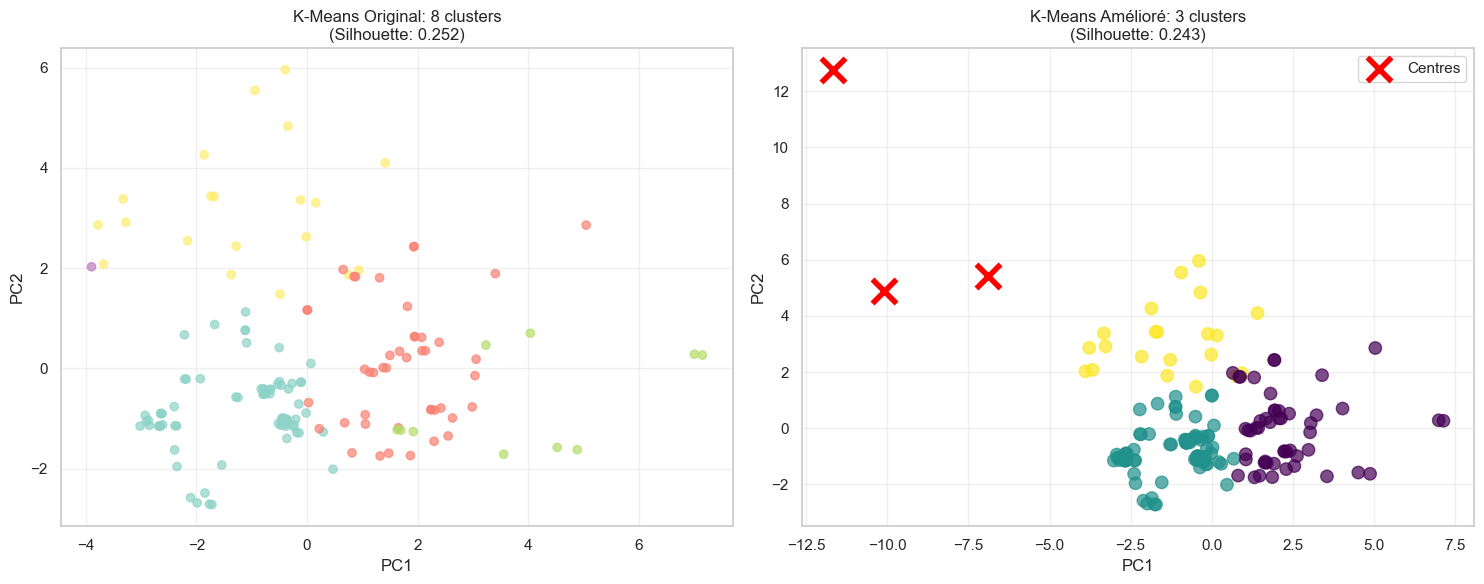


ANALYSE BUSINESS - 3 SEGMENTS

💎 SEGMENT 0 - PREMIUM
   • 50 propriétés (32.9%)
   • Loyer moyen: 712591 TND/mois
   • Range prix: 352800 - 1417500 TND
   • Superficie moyenne: 184 m²
   • Quartiers: {'La Soukra': 22, 'Chotrana 1': 13}
   💡 Cible: Cadres, expatriés, clientèle aisée

🏠 SEGMENT 1 - MOYEN
   • 81 propriétés (53.3%)
   • Loyer moyen: 399587 TND/mois
   • Range prix: 210000 - 695000 TND
   • Superficie moyenne: 106 m²
   • Quartiers: {'La Soukra': 44, 'Chotrana 1': 26}
   💡 Cible: Familles, professionnels, marché principal

💰 SEGMENT 2 - ÉCONOMIQUE
   • 21 propriétés (13.8%)
   • Loyer moyen: 359575 TND/mois
   • Range prix: 145000 - 682500 TND
   • Superficie moyenne: 117 m²
   • Quartiers: {'La Soukra': 14, 'Dar Fadhal': 3}
   💡 Cible: Étudiants, jeunes professionnels, budgets serrés

COMPARAISON FINALE
                     Approche Score Silhouette Clusters viables             Interprétation       Business
    K-Means Auto (8 clusters)           0.2519              4/8 

In [251]:
# ===================================================================
# INTERPRÉTATION ET CORRECTION DES RÉSULTATS K-MEANS
# ===================================================================

print("🔍 ANALYSE DES RÉSULTATS K-MEANS")
print("="*50)

# 1. DIAGNOSTIC DU PROBLÈME
print(f"\n📊 DIAGNOSTIC:")
print(f"• Nombre total de propriétés: {len(df_scaled)}")
print(f"• Nombre de clusters trouvés: {kmeans_n_clusters}")
print(f"• Ratio propriétés/cluster: {len(df_scaled)/kmeans_n_clusters:.1f}")

# Analyser la distribution des clusters
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
print(f"\n📈 DISTRIBUTION DES CLUSTERS:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df_scaled)) * 100
    status = "✅ OK" if count >= 3 else "⚠️ TROP PETIT"
    print(f"Cluster {cluster_id}: {count} propriétés ({percentage:.1f}%) {status}")

# 2. RECOMMANDATION : FORCER 3-4 CLUSTERS
print(f"\n💡 SOLUTION RECOMMANDÉE:")
print(f"Forcer un nombre plus raisonnable de clusters (3-4)")

# ===================================================================
# REFAIRE K-MEANS AVEC 3 CLUSTERS
# ===================================================================
print(f"\n" + "="*50)
print("NOUVEAU K-MEANS AVEC 3 CLUSTERS")
print("="*50)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Appliquer K-Means avec 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(df_scaled)

# Calculer les métriques
silhouette_3 = silhouette_score(df_scaled, labels_3)

print(f"📊 RÉSULTATS AVEC 3 CLUSTERS:")
print(f"Score de silhouette: {silhouette_3:.4f}")

# Distribution des nouveaux clusters
cluster_counts_3 = pd.Series(labels_3).value_counts().sort_index()
print(f"\n📈 NOUVELLE DISTRIBUTION:")
for cluster_id, count in cluster_counts_3.items():
    percentage = (count / len(df_scaled)) * 100
    print(f"Cluster {cluster_id}: {count} propriétés ({percentage:.1f}%)")

# ===================================================================
# VISUALISATION AMÉLIORÉE
# ===================================================================
print(f"\n📊 VISUALISATION COMPARATIVE:")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1: K-Means original (8 clusters)
scatter1 = axes[0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
                          c=kmeans_labels, cmap='Set3', alpha=0.7)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title(f'K-Means Original: 8 clusters\n(Silhouette: {kmeans_metrics["silhouette_score"]:.3f})')
axes[0].grid(True, alpha=0.3)

# Graphique 2: K-Means amélioré (3 clusters)
scatter2 = axes[1].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
                          c=labels_3, cmap='viridis', alpha=0.7, s=80)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title(f'K-Means Amélioré: 3 clusters\n(Silhouette: {silhouette_3:.3f})')
axes[1].grid(True, alpha=0.3)

# Ajouter les centres des clusters pour le modèle amélioré
centers_3_pca = pca_model.transform(scaler.transform(kmeans_3.cluster_centers_))
axes[1].scatter(centers_3_pca[:, 0], centers_3_pca[:, 1], 
               marker='x', s=300, linewidths=4, color='red', label='Centres')
axes[1].legend()

plt.tight_layout()
plt.show()

# ===================================================================
# ANALYSE BUSINESS DES 3 CLUSTERS
# ===================================================================
print(f"\n" + "="*50)
print("ANALYSE BUSINESS - 3 SEGMENTS")
print("="*50)

# Ajouter les nouveaux clusters aux données
filtered_3_clusters = filtered.loc[df_scaled.index].copy()
filtered_3_clusters['Segment'] = labels_3

# Analyser chaque segment
segments_analysis = {}

for cluster_id in sorted(set(labels_3)):
    cluster_data = filtered_3_clusters[filtered_3_clusters['Segment'] == cluster_id]
    
    # Calculs statistiques
    avg_price = cluster_data['price'].mean() if 'price' in cluster_data.columns else 0
    avg_size = cluster_data['size'].mean() if 'size' in cluster_data.columns else 0
    count = len(cluster_data)
    
    # Déterminer le type de segment
    price_quartiles = filtered_3_clusters['price'].quantile([0.33, 0.67])
    
    if avg_price <= price_quartiles[0.33]:
        segment_type = "ÉCONOMIQUE"
        emoji = "💰"
    elif avg_price <= price_quartiles[0.67]:
        segment_type = "MOYEN"
        emoji = "🏠"
    else:
        segment_type = "PREMIUM"
        emoji = "💎"
    
    segments_analysis[cluster_id] = {
        'type': segment_type,
        'emoji': emoji,
        'count': count,
        'avg_price': avg_price,
        'avg_size': avg_size
    }
    
    print(f"\n{emoji} SEGMENT {cluster_id} - {segment_type}")
    print(f"   • {count} propriétés ({count/len(filtered_3_clusters)*100:.1f}%)")
    if 'price' in cluster_data.columns:
        print(f"   • Loyer moyen: {avg_price:.0f} TND/mois")
        print(f"   • Range prix: {cluster_data['price'].min():.0f} - {cluster_data['price'].max():.0f} TND")
    if 'size' in cluster_data.columns:
        print(f"   • Superficie moyenne: {avg_size:.0f} m²")
    
    # Quartiers principaux
    if 'neighborhood' in cluster_data.columns and not cluster_data['neighborhood'].dropna().empty:
        neighborhoods = cluster_data['neighborhood'].value_counts().head(2)
        print(f"   • Quartiers: {neighborhoods.to_dict()}")
    
    # Recommandations business
    if segment_type == "ÉCONOMIQUE":
        print(f"   💡 Cible: Étudiants, jeunes professionnels, budgets serrés")
    elif segment_type == "MOYEN":
        print(f"   💡 Cible: Familles, professionnels, marché principal")
    else:
        print(f"   💡 Cible: Cadres, expatriés, clientèle aisée")

# ===================================================================
# COMPARAISON FINALE
# ===================================================================
print(f"\n" + "="*50)
print("COMPARAISON FINALE")
print("="*50)

comparison_final = pd.DataFrame({
    'Approche': ['K-Means Auto (8 clusters)', 'K-Means Optimisé (3 clusters)'],
    'Score Silhouette': [f"{kmeans_metrics['silhouette_score']:.4f}", f"{silhouette_3:.4f}"],
    'Clusters viables': [f"{sum(1 for c in cluster_counts.values if c >= 3)}/8", "3/3"],
    'Interprétation': ['Difficile (trop fragmenté)', 'Claire (3 segments)'],
    'Business': ['Non applicable', 'Applicable']
})

print(comparison_final.to_string(index=False))

# ===================================================================
# RECOMMANDATION FINALE
# ===================================================================
print(f"\n🎯 RECOMMANDATION FINALE:")
print(f"="*30)

if silhouette_3 >= kmeans_metrics['silhouette_score'] * 0.9:  # Si dans les 90%
    print(f"✅ UTILISER 3 CLUSTERS")
    print(f"   • Score silhouette acceptable: {silhouette_3:.4f}")
    print(f"   • Segments business viables")
    print(f"   • Interprétation claire")
    
    # Sauvegarder les meilleurs résultats
    final_clusters = labels_3
    final_model = kmeans_3
    print(f"\n💾 Variables créées:")
    print(f"   • final_clusters: labels des 3 segments")
    print(f"   • final_model: modèle K-Means optimisé")
    print(f"   • filtered_3_clusters: données avec segments")
    
else:
    print(f"⚠️ CONSIDÉRER D'AUTRES APPROCHES")
    print(f"   • Essayer DBSCAN ou CAH")
    print(f"   • Revoir les caractéristiques utilisées")
    print(f"   • Augmenter le dataset")

print(f"\n🎉 ANALYSE TERMINÉE!")

## DBSCAN

In [ ]:
dbscan_model, dbscan_labels, dbscan_metrics = model_functions.apply_dbscan_clustering(
    df_scaled,
    eps_range=(2.5, 3),      # Range pour eps
    min_samples_range=(2, 18)   # Range pour min_samples
)

In [ ]:

# Visualisation DBSCAN avec matplotlib
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Clusters DBSCAN en 2D PCA
unique_labels = sorted(set(dbscan_labels))
colors_dbscan = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = dbscan_labels == label
    if label == -1:
        # Points de bruit en noir
        axes[0,0].scatter(df_pca.iloc[mask, 0], df_pca.iloc[mask, 1], 
                         c='black', label='Bruit', alpha=0.7, marker='x')
    else:
        axes[0,0].scatter(df_pca.iloc[mask, 0], df_pca.iloc[mask, 1], 
                         c=[colors_dbscan[i]], label=f'Cluster {label}', alpha=0.7)

axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')
axes[0,0].set_title('DBSCAN - Clusters (2D PCA)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Distribution des clusters DBSCAN
cluster_counts_dbscan = pd.Series(dbscan_labels).value_counts().sort_index()
cluster_names = ['Bruit' if idx == -1 else f'Cluster {idx}' for idx in cluster_counts_dbscan.index]
bar_colors = ['black' if idx == -1 else colors_dbscan[i] for i, idx in enumerate(cluster_counts_dbscan.index)]

bars = axes[0,1].bar(range(len(cluster_counts_dbscan)), cluster_counts_dbscan.values, color=bar_colors)
axes[0,1].set_xticks(range(len(cluster_counts_dbscan)))
axes[0,1].set_xticklabels(cluster_names, rotation=45)
axes[0,1].set_ylabel('Nombre de propriétés')
axes[0,1].set_title('Distribution des clusters DBSCAN')
axes[0,1].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, cluster_counts_dbscan.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   str(count), ha='center', va='bottom')



In [ ]:
# Analyse DBSCAN: 
print(f"• Paramètres DBSCAN: eps={dbscan_metrics['eps']:.3f}, min_samples={dbscan_metrics['min_samples']}")
print(f"• Nombre total de propriétés: {len(dbscan_labels)}")
print(f"• Nombre de clusters formés: {dbscan_metrics['n_clusters']}")
print(f"• Points de bruit: {dbscan_metrics['n_noise_points']} ({dbscan_metrics['noise_ratio']*100:.1f}%)")

if dbscan_metrics.get('silhouette_score', 0) > 0:
    print(f"• Score de silhouette: {dbscan_metrics['silhouette_score']:.4f}")

# Analyser la distribution des clusters
unique_labels = set(dbscan_labels)
cluster_distribution = {}

print(f"\n📈 DISTRIBUTION DÉTAILLÉE:")
for label in sorted(unique_labels):
    count = sum(dbscan_labels == label)
    percentage = (count / len(dbscan_labels)) * 100
    cluster_distribution[label] = count
    
    if label == -1:
        print(f"🔍 BRUIT: {count} propriétés ({percentage:.1f}%)")
    else:
        print(f"🏷️ CLUSTER {label}: {count} propriétés ({percentage:.1f}%)")

# ===================================================================
# 2. INTERPRÉTATION DE LA QUALITÉ DU CLUSTERING
# ===================================================================

print(f"\n🎯 ÉVALUATION DE LA QUALITÉ:")
print("="*40)

# Évaluer la qualité selon différents critères
noise_ratio = dbscan_metrics['noise_ratio']
n_clusters = dbscan_metrics['n_clusters']

# Critères de qualité
print(f"\n📊 CRITÈRES D'ÉVALUATION:")

# 1. Ratio de bruit
if noise_ratio < 0.1:
    noise_quality = "EXCELLENT"
    noise_emoji = "✅"
elif noise_ratio < 0.2:
    noise_quality = "BON"
    noise_emoji = "👍"
elif noise_ratio < 0.4:
    noise_quality = "ACCEPTABLE"
    noise_emoji = "⚠️"
else:
    noise_quality = "PROBLÉMATIQUE"
    noise_emoji = "❌"

print(f"{noise_emoji} Ratio de bruit: {noise_ratio*100:.1f}% - {noise_quality}")

# 2. Nombre de clusters
if n_clusters == 0:
    cluster_quality = "AUCUN CLUSTER"
    cluster_emoji = "❌"
elif n_clusters == 1:
    cluster_quality = "UN SEUL GROUPE"
    cluster_emoji = "⚠️"
elif 2 <= n_clusters <= 4:
    cluster_quality = "OPTIMAL"
    cluster_emoji = "✅"
else:
    cluster_quality = "TROP FRAGMENTÉ"
    cluster_emoji = "⚠️"

print(f"{cluster_emoji} Nombre de clusters: {n_clusters} - {cluster_quality}")

# 3. Taille des clusters
min_cluster_size = min([count for label, count in cluster_distribution.items() if label != -1], default=0)
if min_cluster_size >= 3:
    size_quality = "CLUSTERS VIABLES"
    size_emoji = "✅"
elif min_cluster_size >= 2:
    size_quality = "CLUSTERS PETITS"
    size_emoji = "⚠️"
else:
    size_quality = "CLUSTERS TROP PETITS"
    size_emoji = "❌"

print(f"{size_emoji} Taille minimale des clusters: {min_cluster_size} - {size_quality}")

# ===================================================================
# 3. ANALYSE DÉTAILLÉE PAR CLUSTER
# ===================================================================

print(f"\n🔍 ANALYSE DÉTAILLÉE PAR CLUSTER:")
print("="*50)

# Créer un DataFrame avec les données originales et les clusters
filtered_with_dbscan = filtered_3_clusters.copy()
filtered_with_dbscan['Cluster_DBSCAN'] = dbscan_labels

# Analyser chaque cluster individuellement
for label in sorted(unique_labels):
    cluster_data = filtered_with_dbscan[filtered_with_dbscan['Cluster_DBSCAN'] == label]
    
    if label == -1:
        print(f"\n🔍 ANALYSE DES POINTS DE BRUIT - {len(cluster_data)} propriétés")
        print("-" * 60)
        print("❓ QUE REPRÉSENTENT CES PROPRIÉTÉS ?")
        print("• Propriétés avec des caractéristiques UNIQUES/ATYPIQUES")
        print("• Ne ressemblent à aucun autre groupe")
        print("• Peuvent être des OPPORTUNITÉS ou des PROBLÈMES")
        
    else:
        print(f"\n🏷️ CLUSTER {label} - {len(cluster_data)} propriétés")
        print("-" * 50)
        print(f"🎯 PROFIL DU GROUPE:")
    
    # Analyser les caractéristiques du cluster/bruit
    if len(cluster_data) > 0:
        
        # 1. PRIX
        if 'price' in cluster_data.columns:
            prix_stats = {
                'moyenne': cluster_data['price'].mean(),
                'mediane': cluster_data['price'].median(), 
                'min': cluster_data['price'].min(),
                'max': cluster_data['price'].max(),
                'ecart_type': cluster_data['price'].std()
            }
            
            print(f"💰 PRIX DE LOCATION:")
            print(f"   • Moyenne: {prix_stats['moyenne']:.0f} TND/mois")
            print(f"   • Médiane: {prix_stats['mediane']:.0f} TND/mois")
            print(f"   • Range: {prix_stats['min']:.0f} - {prix_stats['max']:.0f} TND")
            if len(cluster_data) > 1:
                print(f"   • Écart-type: {prix_stats['ecart_type']:.0f} TND")
            
            # Comparer à la moyenne générale
            prix_moyen_general = filtered_with_dbscan['price'].mean()
            difference = prix_stats['moyenne'] - prix_moyen_general
            if abs(difference) > 50:  # Si différence significative
                direction = "PLUS CHER" if difference > 0 else "MOINS CHER"
                print(f"   📊 {direction} que la moyenne générale ({difference:+.0f} TND)")
        
        # 2. SUPERFICIE
        if 'size' in cluster_data.columns:
            size_stats = {
                'moyenne': cluster_data['size'].mean(),
                'min': cluster_data['size'].min(),
                'max': cluster_data['size'].max()
            }
            
            print(f"📐 SUPERFICIE:")
            print(f"   • Moyenne: {size_stats['moyenne']:.0f} m²")
            print(f"   • Range: {size_stats['min']:.0f} - {size_stats['max']:.0f} m²")
        
        # 3. NOMBRE DE PIÈCES
        if 'rooms' in cluster_data.columns:
            rooms_avg = cluster_data['rooms'].mean()
            print(f"🏠 PIÈCES: {rooms_avg:.1f} en moyenne")
        
        # 4. LOCALISATION
        if 'neighborhood' in cluster_data.columns and not cluster_data['neighborhood'].dropna().empty:
            quartiers = cluster_data['neighborhood'].value_counts()
            print(f"🏘️ QUARTIERS PRINCIPAUX:")
            for quartier, count in quartiers.head(3).items():
                percentage = (count / len(cluster_data)) * 100
                print(f"   • {quartier}: {count} propriétés ({percentage:.0f}%)")
        
        # 5. ÉTAT DES PROPRIÉTÉS
        if 'condition' in cluster_data.columns and not cluster_data['condition'].dropna().empty:
            conditions = cluster_data['condition'].value_counts()
            print(f"🔧 ÉTAT DES PROPRIÉTÉS:")
            for condition, count in conditions.head(3).items():
                percentage = (count / len(cluster_data)) * 100
                print(f"   • {condition}: {count} propriétés ({percentage:.0f}%)")
        
        # 6. FINITIONS
        if 'finishing' in cluster_data.columns and not cluster_data['finishing'].dropna().empty:
            finitions = cluster_data['finishing'].value_counts()
            print(f"✨ FINITIONS:")
            for finition, count in finitions.head(3).items():
                percentage = (count / len(cluster_data)) * 100
                print(f"   • {finition}: {count} propriétés ({percentage:.0f}%)")
        
        # 7. ÉQUIPEMENTS (si disponibles)
        equipment_cols = ['air_conditioning', 'elevator', 'garden', 'equipped_kitchen', 'swimming_pool']
        available_equipment = [col for col in equipment_cols if col in cluster_data.columns]
        
        if available_equipment:
            print(f"⚡ ÉQUIPEMENTS:")
            for equip in available_equipment:
                if cluster_data[equip].dtype in ['int64', 'float64']:
                    percentage = (cluster_data[equip] == 1).mean() * 100
                    if percentage > 0:
                        print(f"   • {equip}: {percentage:.0f}% des propriétés")

# ===================================================================
# 4. INTERPRÉTATION BUSINESS AVANCÉE
# ===================================================================

print(f"\n💼 INTERPRÉTATION BUSINESS:")
print("="*50)

# Analyser les segments de marché identifiés
segments_business = {}

for label in sorted(unique_labels):
    if label == -1:
        continue  # On analyse le bruit séparément
    
    cluster_data = filtered_with_dbscan[filtered_with_dbscan['Cluster_DBSCAN'] == label]
    
    if 'price' in cluster_data.columns and len(cluster_data) > 0:
        avg_price = cluster_data['price'].mean()
        avg_size = cluster_data['size'].mean() if 'size' in cluster_data.columns else 0
        
        # Déterminer le segment de marché
        price_quartiles = filtered_with_dbscan['price'].quantile([0.25, 0.5, 0.75])
        
        if avg_price <= price_quartiles[0.25]:
            segment_type = "ÉCONOMIQUE"
            segment_emoji = "💰"
            target = "Étudiants, jeunes professionnels, budgets serrés"
            strategy = "Prix compétitifs, localisation accessible"
        elif avg_price <= price_quartiles[0.5]:
            segment_type = "ENTRÉE DE GAMME"
            segment_emoji = "🏠"
            target = "Primo-locataires, petites familles"
            strategy = "Bon rapport qualité/prix, commodités de base"
        elif avg_price <= price_quartiles[0.75]:
            segment_type = "MOYEN STANDING"
            segment_emoji = "🏡"
            target = "Familles, professionnels établis"
            strategy = "Confort, équipements, quartiers résidentiels"
        else:
            segment_type = "HAUT DE GAMME"
            segment_emoji = "💎"
            target = "Cadres, expatriés, clientèle aisée"
            strategy = "Luxe, services premium, localisations privilégiées"
        
        segments_business[label] = {
            'type': segment_type,
            'emoji': segment_emoji,
            'count': len(cluster_data),
            'avg_price': avg_price,
            'avg_size': avg_size,
            'target': target,
            'strategy': strategy
        }
        
        print(f"\n{segment_emoji} CLUSTER {label}: SEGMENT {segment_type}")
        print(f"   📊 {len(cluster_data)} propriétés ({len(cluster_data)/len(filtered_with_dbscan)*100:.1f}% du marché)")
        print(f"   💰 Prix moyen: {avg_price:.0f} TND/mois")
        if avg_size > 0:
            print(f"   📐 Superficie moyenne: {avg_size:.0f} m²")
        print(f"   🎯 Cible: {target}")
        print(f"   💡 Stratégie: {strategy}")

# Analyser les points de bruit spécifiquement
bruit_data = filtered_with_dbscan[filtered_with_dbscan['Cluster_DBSCAN'] == -1]

if len(bruit_data) > 0:
    print(f"\n🔍 ANALYSE SPÉCIALE: POINTS DE BRUIT")
    print("-" * 50)
    print(f"🎯 OPPORTUNITÉS POTENTIELLES:")
    
    if 'price' in bruit_data.columns:
        prix_bruit = bruit_data['price'].tolist()
        prix_median_general = filtered_with_dbscan['price'].median()
        
        print(f"💰 Prix des propriétés atypiques: {prix_bruit}")
        print(f"📊 Prix médian général: {prix_median_general:.0f} TND")
        
        # Identifier les bonnes affaires potentielles
        bonnes_affaires = bruit_data[bruit_data['price'] < prix_median_general]
        proprietes_cheres = bruit_data[bruit_data['price'] > prix_median_general]
        
        if len(bonnes_affaires) > 0:
            print(f"✅ BONNES AFFAIRES POTENTIELLES: {len(bonnes_affaires)} propriétés")
            print(f"   • Prix sous la médiane du marché")
            print(f"   • À investiguer: raison du prix bas?")
        
        if len(proprietes_cheres) > 0:
            print(f"💎 PROPRIÉTÉS PREMIUM UNIQUES: {len(proprietes_cheres)} propriétés")
            print(f"   • Caractéristiques exceptionnelles")
            print(f"   • Segments de niche")

# ===================================================================
# 5. RECOMMANDATIONS D'ACTIONS
# ===================================================================

print(f"\n🚀 RECOMMANDATIONS D'ACTIONS:")
print("="*50)

print(f"\n📈 STRATÉGIES PAR CLUSTER:")
for label, info in segments_business.items():
    print(f"\n{info['emoji']} CLUSTER {label} ({info['type']}):")
    print(f"   📊 Marketing: Cibler {info['target'].lower()}")
    print(f"   💡 Positionnement: {info['strategy']}")
    
    # Recommandations spécifiques selon la taille du cluster
    if info['count'] >= 3:
        print(f"   ✅ Segment viable: développer l'offre")
    else:
        print(f"   ⚠️ Petit segment: analyser la demande")

print(f"\n🔍 ACTIONS POUR LES POINTS DE BRUIT:")
if len(bruit_data) > 0:
    print(f"• Vérifier la qualité des données")
    print(f"• Investiguer les raisons de l'atypisme")
    print(f"• Identifier les opportunités de niche")
    print(f"• Contrôler les prix aberrants")
else:
    print(f"• Aucun point de bruit détecté")
    print(f"• Marché homogène et prévisible")

# ===================================================================
# 6. CONCLUSION GÉNÉRALE
# ===================================================================

print(f"\n🎯 CONCLUSION GÉNÉRALE:")
print("="*30)

if n_clusters >= 2 and noise_ratio < 0.3:
    print(f"✅ DBSCAN A RÉUSSI À SEGMENTER VOS DONNÉES")
    print(f"   • {n_clusters} segments naturels identifiés")
    print(f"   • {dbscan_metrics['n_noise_points']} propriétés atypiques détectées")
    print(f"   • Segmentation applicable pour le business")
    
    # Identifier le segment principal
    main_cluster = max(segments_business.items(), key=lambda x: x[1]['count'])
    print(f"\n🎖️ SEGMENT PRINCIPAL: {main_cluster[1]['type']}")
    print(f"   • {main_cluster[1]['count']} propriétés")
    print(f"   • Représente le cœur de votre marché")

elif n_clusters == 1:
    print(f"⚠️ MARCHÉ TRÈS HOMOGÈNE")
    print(f"   • Un seul groupe principal détecté")
    print(f"   • Peu de différenciation dans l'offre")
    print(f"   • Opportunité de créer des niches")

elif n_clusters == 0:
    print(f"❌ DONNÉES TROP DISPERSÉES")
    print(f"   • DBSCAN n'a trouvé aucun cluster")
    print(f"   • Tous les points considérés comme du bruit")
    print(f"   • Recommandation: utiliser K-Means")

else:
    print(f"⚠️ SEGMENTATION COMPLEXE")
    print(f"   • {n_clusters} clusters détectés")
    print(f"   • Marché très fragmenté")
    print(f"   • Analyser la viabilité de chaque segment")

print(f"\n💾 DONNÉES DISPONIBLES:")
print(f"• filtered_with_dbscan: DataFrame avec clusters DBSCAN")
print(f"• dbscan_labels: labels des clusters pour chaque propriété")
print(f"• dbscan_metrics: métriques de performance")

## CAH

In [ ]:
# CAH avec méthode Ward pour les appartements mis à la vente à La Soukra  (>150 observations)

filtered_df = df_scaled[(df['transaction'] == 'sale') & (df['city'] == 'La Soukra') & (df['property_type'] == 'appartement')]
# 1 -  CAH
linkage_matrix, cluster_labels, optimal_n_clusters, metrics = model_functions.apply_cah_clustering(
    filtered_df, 
    max_clusters=10, 
    linkage_method='ward'
)

# 2  dendrogramme
print("\n📊 DENDROGRAMME:")
dendrogram_data = model_functions.visualize_cah_dendrogram(
    linkage_matrix, 
    optimal_n_clusters=optimal_n_clusters,
    max_display=100
)

# 3. analyse complète
results_df, detailed_df, hierarchy_df = model_functions.complete_cah_analysis_after_dendrogram(
    df, filtered_df, linkage_matrix, cluster_labels, optimal_n_clusters, feature_names
)
print(results_df)